In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

38


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.51315 stdev: 0.09442
Best fitness: 0.68831 - size: (2, 13) - species 4 - id 43
Average adjusted fitness: 0.264
Mean genetic distance 2.755, standard deviation 0.430
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 19.222 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56797 stdev: 0.08729
Best fitness: 0.72604 - size: (2, 13) - species 7 - id 270
Average adjusted fitness: 0.263
Mean genetic distance 2.986, standard deviation 0.489
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.940 sec (19.581 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57810 stdev: 0.09369
Best fitness: 0.77118 - size: (3, 15) - species 5 - id 512
Average adjusted fitness: 0.287
Mean genetic distance 3.060, standard deviation 0.482
Population of 199 members in 31 species
Total extinct

Population's average fitness: 0.73592 stdev: 0.13054
Best fitness: 0.87941 - size: (5, 20) - species 14 - id 1086
Average adjusted fitness: 0.524
Mean genetic distance 3.084, standard deviation 0.537
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 28.318 sec (25.535 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73005 stdev: 0.15544
Best fitness: 0.87941 - size: (5, 20) - species 14 - id 1086
Average adjusted fitness: 0.519
Mean genetic distance 3.094, standard deviation 0.546
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 28.581 sec (26.385 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68938 stdev: 0.18875
Best fitness: 0.87941 - size: (5, 20) - species 14 - id 1086
Average adjusted fitness: 0.477
Mean genetic distance 3.082, standard deviation 0.540
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 25.590 sec (26.717 average)

 

Population's average fitness: 0.61319 stdev: 0.12864
Best fitness: 0.77242 - size: (4, 13) - species 1 - id 675
Average adjusted fitness: 0.336
Mean genetic distance 2.985, standard deviation 0.485
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 21.941 sec (21.966 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61324 stdev: 0.14080
Best fitness: 0.77242 - size: (4, 13) - species 1 - id 675
Average adjusted fitness: 0.316
Mean genetic distance 3.026, standard deviation 0.496
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 30.270 sec (23.627 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62540 stdev: 0.12768
Best fitness: 0.77242 - size: (4, 13) - species 1 - id 675
Average adjusted fitness: 0.322
Mean genetic distance 3.052, standard deviation 0.503
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 38.178 sec (26.052 average)

 ****** R

Population's average fitness: 0.59519 stdev: 0.09230
Best fitness: 0.75881 - size: (7, 23) - species 23 - id 1813
Average adjusted fitness: 0.224
Mean genetic distance 3.176, standard deviation 0.470
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 21.965 sec (20.987 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60291 stdev: 0.09015
Best fitness: 0.75881 - size: (7, 23) - species 23 - id 1813
Average adjusted fitness: 0.246
Mean genetic distance 3.201, standard deviation 0.476
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 21.604 sec (21.134 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59385 stdev: 0.09704
Best fitness: 0.75881 - size: (7, 23) - species 23 - id 1813
Average adjusted fitness: 0.253
Mean genetic distance 3.193, standard deviation 0.469
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 21.986 sec (21.338 average)
nu

Population's average fitness: 0.61349 stdev: 0.09259
Best fitness: 0.78664 - size: (6, 21) - species 21 - id 1028
Average adjusted fitness: 0.295
Mean genetic distance 3.061, standard deviation 0.521
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 20.275 sec (19.254 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62317 stdev: 0.09417
Best fitness: 0.80334 - size: (7, 23) - species 28 - id 1317
Average adjusted fitness: 0.290
Mean genetic distance 3.102, standard deviation 0.524
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 21.393 sec (19.521 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63927 stdev: 0.09090
Best fitness: 0.80334 - size: (7, 23) - species 28 - id 1317
Average adjusted fitness: 0.274
Mean genetic distance 3.123, standard deviation 0.514
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 20.781 sec (19.661 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.50839 stdev: 0.05152
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.136
Mean genetic distance 2.972, standard deviation 0.496
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.733 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52456 stdev: 0.06237
Best fitness: 0.70563 - size: (2, 13) - species 3 - id 289
Average adjusted fitness: 0.288
Mean genetic distance 3.025, standard deviation 0.498
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 18.348 sec (18.041 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54248 stdev: 0.06433
Best fitness: 0.73717 - size: (3, 14) - species 18 - id 462
Average adjusted fitness: 0.111
Mean genetic distance 3.050, standard deviation 0.497
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 18.748 sec (18.2

Population's average fitness: 0.66487 stdev: 0.12163
Best fitness: 0.80767 - size: (2, 13) - species 3 - id 967
Average adjusted fitness: 0.382
Mean genetic distance 3.177, standard deviation 0.486
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 21.681 sec (20.023 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67786 stdev: 0.10907
Best fitness: 0.80767 - size: (2, 13) - species 3 - id 967
Average adjusted fitness: 0.428
Mean genetic distance 3.166, standard deviation 0.484
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 21.791 sec (20.509 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67743 stdev: 0.10531
Best fitness: 0.80767 - size: (2, 13) - species 3 - id 967
Average adjusted fitness: 0.353
Mean genetic distance 3.186, standard deviation 0.490
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 22.140 sec (20.891 average)

 ******

Population's average fitness: 0.60812 stdev: 0.14721
Best fitness: 0.79530 - size: (4, 18) - species 10 - id 546
Average adjusted fitness: 0.327
Mean genetic distance 3.006, standard deviation 0.461
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 20.351 sec (18.742 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61108 stdev: 0.14568
Best fitness: 0.80148 - size: (4, 19) - species 37 - id 829
Average adjusted fitness: 0.373
Mean genetic distance 3.074, standard deviation 0.457
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 21.172 sec (19.228 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63562 stdev: 0.12761
Best fitness: 0.80148 - size: (4, 19) - species 37 - id 829
Average adjusted fitness: 0.361
Mean genetic distance 3.059, standard deviation 0.487
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 21.705 sec (19.641 average)

 *****

Population's average fitness: 0.60373 stdev: 0.08905
Best fitness: 0.74706 - size: (4, 18) - species 9 - id 1646
Average adjusted fitness: 0.249
Mean genetic distance 3.169, standard deviation 0.488
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 22.013 sec (21.049 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60796 stdev: 0.08771
Best fitness: 0.74706 - size: (4, 18) - species 9 - id 1646
Average adjusted fitness: 0.239
Mean genetic distance 3.174, standard deviation 0.483
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 22.494 sec (21.337 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60606 stdev: 0.09331
Best fitness: 0.74706 - size: (4, 18) - species 9 - id 1646
Average adjusted fitness: 0.226
Mean genetic distance 3.167, standard deviation 0.482
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 21.479 sec (21.453 average)
numbe

Population's average fitness: 0.58256 stdev: 0.08496
Best fitness: 0.75881 - size: (3, 16) - species 19 - id 455
Average adjusted fitness: 0.271
Mean genetic distance 3.152, standard deviation 0.466
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 21.015 sec (19.319 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59861 stdev: 0.08597
Best fitness: 0.75881 - size: (3, 16) - species 38 - id 455
Average adjusted fitness: 0.288
Mean genetic distance 3.183, standard deviation 0.464
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 21.030 sec (19.533 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59598 stdev: 0.08621
Best fitness: 0.75881 - size: (3, 16) - species 21 - id 455
Average adjusted fitness: 0.249
Mean genetic distance 3.188, standard deviation 0.468
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 21.061 sec (19.703 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49879 stdev: 0.05422
Best fitness: 0.67842 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.171
Mean genetic distance 2.826, standard deviation 0.429
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 17.181 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52900 stdev: 0.05346
Best fitness: 0.67842 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.124
Mean genetic distance 2.866, standard deviation 0.465
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 18.112 sec (17.647 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54061 stdev: 0.05811
Best fitness: 0.67842 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.165
Mean genetic distance 2.906, standard deviation 0.473
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 19.447 sec (18.2

Population's average fitness: 0.58983 stdev: 0.08712
Best fitness: 0.72171 - size: (4, 17) - species 4 - id 1234
Average adjusted fitness: 0.233
Mean genetic distance 3.164, standard deviation 0.487
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 21.916 sec (20.134 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59713 stdev: 0.08797
Best fitness: 0.72913 - size: (4, 19) - species 15 - id 1518
Average adjusted fitness: 0.256
Mean genetic distance 3.191, standard deviation 0.492
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 22.059 sec (20.628 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59982 stdev: 0.08569
Best fitness: 0.72913 - size: (4, 19) - species 15 - id 1518
Average adjusted fitness: 0.210
Mean genetic distance 3.219, standard deviation 0.482
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 22.581 sec (21.056 average)

 *

Population's average fitness: 0.59126 stdev: 0.07041
Best fitness: 0.72604 - size: (4, 17) - species 24 - id 530
Average adjusted fitness: 0.198
Mean genetic distance 3.105, standard deviation 0.474
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 19.876 sec (18.490 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58572 stdev: 0.07154
Best fitness: 0.72604 - size: (4, 17) - species 24 - id 530
Average adjusted fitness: 0.181
Mean genetic distance 3.094, standard deviation 0.461
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 21.027 sec (18.997 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59141 stdev: 0.08103
Best fitness: 0.72604 - size: (4, 17) - species 3 - id 530
Average adjusted fitness: 0.236
Mean genetic distance 3.121, standard deviation 0.457
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 21.438 sec (19.404 average)

 ******

Population's average fitness: 0.68530 stdev: 0.11996
Best fitness: 0.83859 - size: (7, 25) - species 18 - id 1283
Average adjusted fitness: 0.382
Mean genetic distance 3.184, standard deviation 0.527
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 21.881 sec (21.215 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69536 stdev: 0.10504
Best fitness: 0.83859 - size: (7, 25) - species 18 - id 1283
Average adjusted fitness: 0.444
Mean genetic distance 3.121, standard deviation 0.540
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 22.260 sec (21.449 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67494 stdev: 0.13318
Best fitness: 0.83859 - size: (7, 25) - species 18 - id 1283
Average adjusted fitness: 0.386
Mean genetic distance 3.156, standard deviation 0.519
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 22.501 sec (21.626 average)
nu

Population's average fitness: 0.60532 stdev: 0.08045
Best fitness: 0.76067 - size: (3, 14) - species 18 - id 680
Average adjusted fitness: 0.278
Mean genetic distance 3.111, standard deviation 0.488
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 20.298 sec (19.260 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60761 stdev: 0.07768
Best fitness: 0.76067 - size: (3, 14) - species 18 - id 680
Average adjusted fitness: 0.227
Mean genetic distance 3.111, standard deviation 0.492
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 20.691 sec (19.439 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60998 stdev: 0.08156
Best fitness: 0.76067 - size: (3, 14) - species 18 - id 680
Average adjusted fitness: 0.225
Mean genetic distance 3.103, standard deviation 0.491
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 20.258 sec (19.530 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.52014 stdev: 0.08658
Best fitness: 0.66605 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.197
Mean genetic distance 2.898, standard deviation 0.481
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.090 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56428 stdev: 0.07583
Best fitness: 0.67471 - size: (2, 13) - species 15 - id 267
Average adjusted fitness: 0.219
Mean genetic distance 2.995, standard deviation 0.497
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 18.301 sec (17.695 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57143 stdev: 0.07657
Best fitness: 0.72975 - size: (4, 16) - species 6 - id 473
Average adjusted fitness: 0.219
Mean genetic distance 3.017, standard deviation 0.500
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 19.595 sec (18.

Population's average fitness: 0.68053 stdev: 0.19174
Best fitness: 0.85405 - size: (5, 19) - species 14 - id 1151
Average adjusted fitness: 0.439
Mean genetic distance 3.029, standard deviation 0.508
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.974 sec (19.784 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68280 stdev: 0.19907
Best fitness: 0.85405 - size: (5, 19) - species 14 - id 1151
Average adjusted fitness: 0.444
Mean genetic distance 3.007, standard deviation 0.505
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 21.473 sec (20.237 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71153 stdev: 0.16991
Best fitness: 0.85405 - size: (5, 19) - species 14 - id 1151
Average adjusted fitness: 0.472
Mean genetic distance 3.037, standard deviation 0.504
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 21.940 sec (20.618 average)

 

Population's average fitness: 0.58792 stdev: 0.10228
Best fitness: 0.77613 - size: (3, 15) - species 30 - id 476
Average adjusted fitness: 0.227
Mean genetic distance 3.045, standard deviation 0.516
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 20.110 sec (18.750 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59956 stdev: 0.10158
Best fitness: 0.80891 - size: (4, 17) - species 21 - id 795
Average adjusted fitness: 0.294
Mean genetic distance 3.114, standard deviation 0.490
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 20.524 sec (19.105 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59811 stdev: 0.10692
Best fitness: 0.81076 - size: (3, 13) - species 1 - id 956
Average adjusted fitness: 0.267
Mean genetic distance 3.158, standard deviation 0.508
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 20.965 sec (19.415 average)

 ******

Population's average fitness: 0.64903 stdev: 0.11623
Best fitness: 0.83735 - size: (6, 20) - species 40 - id 1110
Average adjusted fitness: 0.324
Mean genetic distance 3.250, standard deviation 0.473
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 23.066 sec (21.725 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65556 stdev: 0.11622
Best fitness: 0.83735 - size: (6, 20) - species 40 - id 1110
Average adjusted fitness: 0.275
Mean genetic distance 3.247, standard deviation 0.467
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 23.531 sec (22.090 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63407 stdev: 0.12831
Best fitness: 0.86209 - size: (9, 26) - species 39 - id 2091
Average adjusted fitness: 0.326
Mean genetic distance 3.237, standard deviation 0.473
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 23.399 sec (22.424 average)
nu

Population's average fitness: 0.60126 stdev: 0.09063
Best fitness: 0.80272 - size: (6, 21) - species 3 - id 1058
Average adjusted fitness: 0.180
Mean genetic distance 3.177, standard deviation 0.488
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 21.331 sec (19.575 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60540 stdev: 0.09085
Best fitness: 0.80272 - size: (6, 21) - species 3 - id 1058
Average adjusted fitness: 0.153
Mean genetic distance 3.180, standard deviation 0.496
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 21.275 sec (19.788 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61485 stdev: 0.09674
Best fitness: 0.80519 - size: (4, 18) - species 2 - id 1328
Average adjusted fitness: 0.256
Mean genetic distance 3.196, standard deviation 0.492
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 21.697 sec (20.000 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49770 stdev: 0.04842
Best fitness: 0.64564 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.163
Mean genetic distance 2.861, standard deviation 0.424
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.121 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52793 stdev: 0.05561
Best fitness: 0.68831 - size: (3, 14) - species 18 - id 317
Average adjusted fitness: 0.167
Mean genetic distance 2.959, standard deviation 0.442
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 17.973 sec (17.547 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54442 stdev: 0.05953
Best fitness: 0.68831 - size: (3, 14) - species 18 - id 317
Average adjusted fitness: 0.130
Mean genetic distance 3.025, standard deviation 0.461
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 19.236 sec (18

Population's average fitness: 0.60228 stdev: 0.07388
Best fitness: 0.73098 - size: (2, 13) - species 3 - id 693
Average adjusted fitness: 0.230
Mean genetic distance 3.113, standard deviation 0.487
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 22.140 sec (20.181 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61737 stdev: 0.06302
Best fitness: 0.73098 - size: (2, 13) - species 3 - id 693
Average adjusted fitness: 0.217
Mean genetic distance 3.138, standard deviation 0.501
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 21.755 sec (20.630 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61032 stdev: 0.07337
Best fitness: 0.73098 - size: (2, 13) - species 3 - id 693
Average adjusted fitness: 0.229
Mean genetic distance 3.129, standard deviation 0.487
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.297 sec (20.903 average)

 ******

Population's average fitness: 0.59053 stdev: 0.10704
Best fitness: 0.75881 - size: (3, 15) - species 15 - id 590
Average adjusted fitness: 0.292
Mean genetic distance 3.044, standard deviation 0.480
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 19.936 sec (18.650 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61745 stdev: 0.10005
Best fitness: 0.78541 - size: (4, 17) - species 28 - id 741
Average adjusted fitness: 0.218
Mean genetic distance 3.080, standard deviation 0.455
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.656 sec (19.051 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62158 stdev: 0.10657
Best fitness: 0.78541 - size: (4, 17) - species 28 - id 741
Average adjusted fitness: 0.233
Mean genetic distance 3.116, standard deviation 0.477
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 21.135 sec (19.398 average)

 *****

Population's average fitness: 0.60605 stdev: 0.08380
Best fitness: 0.72975 - size: (7, 20) - species 3 - id 1813
Average adjusted fitness: 0.239
Mean genetic distance 3.099, standard deviation 0.511
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 23.418 sec (21.505 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61207 stdev: 0.08503
Best fitness: 0.72975 - size: (7, 20) - species 3 - id 1813
Average adjusted fitness: 0.259
Mean genetic distance 3.092, standard deviation 0.497
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.513 sec (21.918 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61389 stdev: 0.08163
Best fitness: 0.72975 - size: (7, 20) - species 3 - id 1813
Average adjusted fitness: 0.277
Mean genetic distance 3.097, standard deviation 0.501
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 23.829 sec (22.324 average)
numbe

Population's average fitness: 0.60261 stdev: 0.09920
Best fitness: 0.79530 - size: (3, 14) - species 20 - id 540
Average adjusted fitness: 0.366
Mean genetic distance 3.116, standard deviation 0.467
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 21.559 sec (19.806 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61363 stdev: 0.09433
Best fitness: 0.79530 - size: (3, 14) - species 20 - id 540
Average adjusted fitness: 0.183
Mean genetic distance 3.113, standard deviation 0.460
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 22.313 sec (20.120 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61925 stdev: 0.09981
Best fitness: 0.79530 - size: (3, 14) - species 20 - id 540
Average adjusted fitness: 0.275
Mean genetic distance 3.143, standard deviation 0.449
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 21.410 sec (20.263 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.57733 stdev: 0.21769
Best fitness: 0.85591 - size: (2, 13) - species 8 - id 179
Average adjusted fitness: 0.390
Mean genetic distance 2.933, standard deviation 0.494
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67588 stdev: 0.19335
Best fitness: 0.85591 - size: (2, 13) - species 3 - id 179
Average adjusted fitness: 0.532
Mean genetic distance 2.941, standard deviation 0.482
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.322 sec (17.745 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69742 stdev: 0.17952
Best fitness: 0.86209 - size: (3, 16) - species 8 - id 529
Average adjusted fitness: 0.520
Mean genetic distance 2.981, standard deviation 0.516
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 19.307 sec (18.2

Population's average fitness: 0.65819 stdev: 0.12851
Best fitness: 0.84416 - size: (3, 14) - species 4 - id 535
Average adjusted fitness: 0.370
Mean genetic distance 3.115, standard deviation 0.498
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 20.635 sec (19.890 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65454 stdev: 0.13988
Best fitness: 0.84416 - size: (3, 14) - species 4 - id 535
Average adjusted fitness: 0.391
Mean genetic distance 3.117, standard deviation 0.501
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 21.345 sec (20.296 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67161 stdev: 0.12131
Best fitness: 0.84416 - size: (3, 14) - species 4 - id 535
Average adjusted fitness: 0.395
Mean genetic distance 3.090, standard deviation 0.496
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 20.804 sec (20.558 average)

 ******

Population's average fitness: 0.63794 stdev: 0.13412
Best fitness: 0.81571 - size: (5, 18) - species 36 - id 686
Average adjusted fitness: 0.434
Mean genetic distance 3.098, standard deviation 0.487
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 19.836 sec (18.812 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65008 stdev: 0.13215
Best fitness: 0.81571 - size: (5, 18) - species 36 - id 686
Average adjusted fitness: 0.351
Mean genetic distance 3.097, standard deviation 0.489
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 20.522 sec (19.154 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67213 stdev: 0.11334
Best fitness: 0.81571 - size: (5, 18) - species 36 - id 686
Average adjusted fitness: 0.389
Mean genetic distance 3.093, standard deviation 0.518
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 21.157 sec (19.488 average)

 *****

Population's average fitness: 0.64551 stdev: 0.11221
Best fitness: 0.83055 - size: (4, 16) - species 23 - id 1300
Average adjusted fitness: 0.382
Mean genetic distance 3.181, standard deviation 0.473
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 23.743 sec (21.737 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65309 stdev: 0.11556
Best fitness: 0.83055 - size: (4, 16) - species 23 - id 1300
Average adjusted fitness: 0.459
Mean genetic distance 3.186, standard deviation 0.468
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 23.083 sec (22.030 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65873 stdev: 0.10828
Best fitness: 0.83302 - size: (4, 16) - species 23 - id 2047
Average adjusted fitness: 0.391
Mean genetic distance 3.193, standard deviation 0.464
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 22.453 sec (22.243 average)
nu

Population's average fitness: 0.61049 stdev: 0.08518
Best fitness: 0.77860 - size: (3, 15) - species 20 - id 1112
Average adjusted fitness: 0.245
Mean genetic distance 3.039, standard deviation 0.500
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 22.135 sec (20.287 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61591 stdev: 0.08617
Best fitness: 0.77860 - size: (3, 15) - species 20 - id 1112
Average adjusted fitness: 0.238
Mean genetic distance 3.029, standard deviation 0.505
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 22.265 sec (20.534 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62196 stdev: 0.08293
Best fitness: 0.77860 - size: (3, 15) - species 20 - id 1112
Average adjusted fitness: 0.254
Mean genetic distance 3.047, standard deviation 0.498
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 22.452 sec (20.747 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47823 stdev: 0.09401
Best fitness: 0.74521 - size: (2, 13) - species 1 - id 15
Average adjusted fitness: 0.176
Mean genetic distance 2.879, standard deviation 0.442
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 17.307 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53792 stdev: 0.08705
Best fitness: 0.74521 - size: (2, 13) - species 4 - id 15
Average adjusted fitness: 0.214
Mean genetic distance 2.980, standard deviation 0.464
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 18.444 sec (17.876 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56216 stdev: 0.08635
Best fitness: 0.74521 - size: (2, 13) - species 19 - id 15
Average adjusted fitness: 0.235
Mean genetic distance 2.997, standard deviation 0.458
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 19.519 sec (18.423

Population's average fitness: 0.62859 stdev: 0.10818
Best fitness: 0.78788 - size: (3, 15) - species 19 - id 1286
Average adjusted fitness: 0.243
Mean genetic distance 3.217, standard deviation 0.504
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.524 sec (21.008 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63408 stdev: 0.10970
Best fitness: 0.78850 - size: (11, 30) - species 32 - id 1692
Average adjusted fitness: 0.279
Mean genetic distance 3.202, standard deviation 0.506
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 24.084 sec (21.641 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63884 stdev: 0.10876
Best fitness: 0.79654 - size: (11, 28) - species 32 - id 1832
Average adjusted fitness: 0.306
Mean genetic distance 3.214, standard deviation 0.503
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 23.290 sec (22.115 average)


Population's average fitness: 0.57746 stdev: 0.08295
Best fitness: 0.73284 - size: (2, 13) - species 8 - id 685
Average adjusted fitness: 0.224
Mean genetic distance 2.983, standard deviation 0.480
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 19.395 sec (18.534 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58057 stdev: 0.08794
Best fitness: 0.73284 - size: (2, 13) - species 8 - id 685
Average adjusted fitness: 0.252
Mean genetic distance 3.039, standard deviation 0.505
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 20.501 sec (18.928 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57350 stdev: 0.09624
Best fitness: 0.73284 - size: (2, 13) - species 8 - id 685
Average adjusted fitness: 0.255
Mean genetic distance 3.098, standard deviation 0.504
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 20.768 sec (19.234 average)

 ****** R

Population's average fitness: 0.60515 stdev: 0.07174
Best fitness: 0.72294 - size: (3, 16) - species 27 - id 828
Average adjusted fitness: 0.212
Mean genetic distance 3.219, standard deviation 0.511
Population of 190 members in 40 species
Total extinctions: 0
Generation time: 22.837 sec (21.803 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60282 stdev: 0.07115
Best fitness: 0.72542 - size: (8, 25) - species 24 - id 1907
Average adjusted fitness: 0.201
Mean genetic distance 3.236, standard deviation 0.499
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 22.379 sec (22.032 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60445 stdev: 0.07350
Best fitness: 0.72542 - size: (8, 25) - species 24 - id 1907
Average adjusted fitness: 0.243
Mean genetic distance 3.246, standard deviation 0.512
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 23.019 sec (22.275 average)
num

Population's average fitness: 0.63910 stdev: 0.13094
Best fitness: 0.81571 - size: (3, 15) - species 24 - id 959
Average adjusted fitness: 0.383
Mean genetic distance 3.144, standard deviation 0.506
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 21.092 sec (19.659 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64820 stdev: 0.13472
Best fitness: 0.82870 - size: (4, 16) - species 21 - id 1220
Average adjusted fitness: 0.346
Mean genetic distance 3.155, standard deviation 0.515
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 21.591 sec (19.900 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66280 stdev: 0.12599
Best fitness: 0.82870 - size: (4, 16) - species 21 - id 1220
Average adjusted fitness: 0.370
Mean genetic distance 3.189, standard deviation 0.500
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 21.720 sec (20.102 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.49011 stdev: 0.09637
Best fitness: 0.69511 - size: (2, 13) - species 4 - id 183
Average adjusted fitness: 0.211
Mean genetic distance 2.869, standard deviation 0.485
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.326 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54480 stdev: 0.10381
Best fitness: 0.82375 - size: (3, 15) - species 7 - id 371
Average adjusted fitness: 0.253
Mean genetic distance 2.911, standard deviation 0.491
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.240 sec (17.783 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57815 stdev: 0.09593
Best fitness: 0.82375 - size: (3, 15) - species 2 - id 371
Average adjusted fitness: 0.230
Mean genetic distance 2.916, standard deviation 0.500
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 18.953 sec (18.1

Population's average fitness: 0.58360 stdev: 0.07335
Best fitness: 0.73160 - size: (3, 13) - species 21 - id 892
Average adjusted fitness: 0.161
Mean genetic distance 3.115, standard deviation 0.468
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 22.880 sec (20.760 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58132 stdev: 0.07713
Best fitness: 0.73160 - size: (3, 13) - species 20 - id 892
Average adjusted fitness: 0.197
Mean genetic distance 3.154, standard deviation 0.474
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 23.190 sec (21.365 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58944 stdev: 0.07552
Best fitness: 0.73160 - size: (3, 13) - species 20 - id 892
Average adjusted fitness: 0.188
Mean genetic distance 3.142, standard deviation 0.468
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 23.041 sec (21.815 average)

 ***

Population's average fitness: 0.59811 stdev: 0.08632
Best fitness: 0.76994 - size: (4, 16) - species 8 - id 673
Average adjusted fitness: 0.245
Mean genetic distance 3.083, standard deviation 0.497
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 20.062 sec (18.885 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61196 stdev: 0.07736
Best fitness: 0.76994 - size: (4, 16) - species 30 - id 673
Average adjusted fitness: 0.306
Mean genetic distance 3.164, standard deviation 0.503
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 20.656 sec (19.239 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61280 stdev: 0.08853
Best fitness: 0.76994 - size: (4, 16) - species 30 - id 673
Average adjusted fitness: 0.250
Mean genetic distance 3.181, standard deviation 0.495
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 20.949 sec (19.524 average)

 ******

Population's average fitness: 0.61271 stdev: 0.08544
Best fitness: 0.76067 - size: (6, 19) - species 22 - id 1819
Average adjusted fitness: 0.232
Mean genetic distance 3.168, standard deviation 0.497
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 22.251 sec (21.519 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60976 stdev: 0.09065
Best fitness: 0.76067 - size: (6, 19) - species 22 - id 1819
Average adjusted fitness: 0.245
Mean genetic distance 3.159, standard deviation 0.487
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 22.229 sec (21.712 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61214 stdev: 0.09483
Best fitness: 0.76067 - size: (6, 19) - species 22 - id 1819
Average adjusted fitness: 0.304
Mean genetic distance 3.153, standard deviation 0.494
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 22.477 sec (21.925 average)
nu

Population's average fitness: 0.60103 stdev: 0.09787
Best fitness: 0.78479 - size: (3, 15) - species 6 - id 293
Average adjusted fitness: 0.242
Mean genetic distance 3.193, standard deviation 0.479
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 22.443 sec (20.401 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61875 stdev: 0.08453
Best fitness: 0.78479 - size: (3, 15) - species 6 - id 293
Average adjusted fitness: 0.254
Mean genetic distance 3.212, standard deviation 0.480
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 21.732 sec (20.567 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61804 stdev: 0.08760
Best fitness: 0.78479 - size: (3, 15) - species 6 - id 293
Average adjusted fitness: 0.258
Mean genetic distance 3.213, standard deviation 0.477
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 22.338 sec (20.764 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.47837 stdev: 0.09880
Best fitness: 0.72171 - size: (2, 13) - species 8 - id 141
Average adjusted fitness: 0.270
Mean genetic distance 2.887, standard deviation 0.512
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 17.466 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54044 stdev: 0.10426
Best fitness: 0.83426 - size: (3, 14) - species 8 - id 374
Average adjusted fitness: 0.283
Mean genetic distance 2.957, standard deviation 0.522
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 18.224 sec (17.845 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56562 stdev: 0.10749
Best fitness: 0.83426 - size: (3, 14) - species 8 - id 374
Average adjusted fitness: 0.256
Mean genetic distance 2.995, standard deviation 0.509
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.249 sec (18.3

Population's average fitness: 0.71508 stdev: 0.17009
Best fitness: 0.84477 - size: (3, 17) - species 5 - id 596
Average adjusted fitness: 0.484
Mean genetic distance 3.148, standard deviation 0.499
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 21.512 sec (19.901 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70540 stdev: 0.17497
Best fitness: 0.84477 - size: (3, 17) - species 5 - id 596
Average adjusted fitness: 0.473
Mean genetic distance 3.142, standard deviation 0.507
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 21.725 sec (20.380 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70517 stdev: 0.18482
Best fitness: 0.84477 - size: (3, 17) - species 5 - id 596
Average adjusted fitness: 0.474
Mean genetic distance 3.116, standard deviation 0.506
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 22.247 sec (20.778 average)

 ******

Population's average fitness: 0.65339 stdev: 0.18498
Best fitness: 0.84106 - size: (3, 14) - species 17 - id 320
Average adjusted fitness: 0.420
Mean genetic distance 3.107, standard deviation 0.500
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 19.889 sec (18.586 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67724 stdev: 0.17397
Best fitness: 0.84106 - size: (3, 14) - species 9 - id 320
Average adjusted fitness: 0.454
Mean genetic distance 3.113, standard deviation 0.484
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 19.384 sec (18.746 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70204 stdev: 0.15287
Best fitness: 0.85343 - size: (6, 23) - species 20 - id 929
Average adjusted fitness: 0.492
Mean genetic distance 3.142, standard deviation 0.501
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 20.481 sec (19.035 average)

 ******

Population's average fitness: 0.59528 stdev: 0.07793
Best fitness: 0.70686 - size: (5, 20) - species 22 - id 1536
Average adjusted fitness: 0.219
Mean genetic distance 3.143, standard deviation 0.508
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.715 sec (20.839 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58874 stdev: 0.08042
Best fitness: 0.70686 - size: (5, 20) - species 22 - id 1536
Average adjusted fitness: 0.274
Mean genetic distance 3.172, standard deviation 0.508
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 22.684 sec (21.197 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59960 stdev: 0.06999
Best fitness: 0.70686 - size: (5, 20) - species 22 - id 1536
Average adjusted fitness: 0.244
Mean genetic distance 3.148, standard deviation 0.505
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 21.844 sec (21.440 average)
nu

Population's average fitness: 0.64200 stdev: 0.13125
Best fitness: 0.79283 - size: (4, 13) - species 25 - id 1061
Average adjusted fitness: 0.384
Mean genetic distance 3.137, standard deviation 0.488
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 21.254 sec (19.583 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64288 stdev: 0.13813
Best fitness: 0.79468 - size: (4, 19) - species 19 - id 1183
Average adjusted fitness: 0.417
Mean genetic distance 3.194, standard deviation 0.492
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 21.133 sec (19.776 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65125 stdev: 0.13700
Best fitness: 0.81447 - size: (3, 18) - species 19 - id 1341
Average adjusted fitness: 0.334
Mean genetic distance 3.175, standard deviation 0.492
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 21.832 sec (20.005 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47121 stdev: 0.21477
Best fitness: 0.82127 - size: (2, 13) - species 2 - id 34
Average adjusted fitness: 0.324
Mean genetic distance 2.893, standard deviation 0.454
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 17.671 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58996 stdev: 0.21293
Best fitness: 0.82127 - size: (2, 13) - species 2 - id 34
Average adjusted fitness: 0.390
Mean genetic distance 2.981, standard deviation 0.472
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.752 sec (18.212 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66816 stdev: 0.19485
Best fitness: 0.83488 - size: (3, 15) - species 1 - id 532
Average adjusted fitness: 0.440
Mean genetic distance 2.994, standard deviation 0.499
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 19.742 sec (18.722

Population's average fitness: 0.67214 stdev: 0.10975
Best fitness: 0.81571 - size: (2, 15) - species 9 - id 976
Average adjusted fitness: 0.375
Mean genetic distance 3.133, standard deviation 0.511
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.451 sec (19.880 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68198 stdev: 0.09950
Best fitness: 0.81571 - size: (2, 15) - species 9 - id 976
Average adjusted fitness: 0.392
Mean genetic distance 3.130, standard deviation 0.504
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.826 sec (20.298 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67866 stdev: 0.10371
Best fitness: 0.81571 - size: (2, 15) - species 9 - id 976
Average adjusted fitness: 0.378
Mean genetic distance 3.171, standard deviation 0.510
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 22.759 sec (20.711 average)

 ******

Population's average fitness: 0.60831 stdev: 0.12068
Best fitness: 0.84106 - size: (4, 14) - species 1 - id 689
Average adjusted fitness: 0.368
Mean genetic distance 3.109, standard deviation 0.451
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 20.011 sec (18.982 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62499 stdev: 0.10874
Best fitness: 0.85652 - size: (5, 19) - species 24 - id 820
Average adjusted fitness: 0.265
Mean genetic distance 3.140, standard deviation 0.453
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 20.497 sec (19.285 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62449 stdev: 0.11981
Best fitness: 0.85652 - size: (5, 19) - species 24 - id 820
Average adjusted fitness: 0.327
Mean genetic distance 3.151, standard deviation 0.452
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 20.885 sec (19.552 average)

 ******

Population's average fitness: 0.83897 stdev: 0.18129
Best fitness: 0.98578 - size: (2, 14) - species 5 - id 689
Average adjusted fitness: 0.721
Mean genetic distance 3.023, standard deviation 0.499
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.372 sec (20.754 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.84081 stdev: 0.17919
Best fitness: 0.98578 - size: (2, 14) - species 5 - id 689
Average adjusted fitness: 0.761
Mean genetic distance 3.031, standard deviation 0.497
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 21.766 sec (20.964 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.83876 stdev: 0.18220
Best fitness: 0.98578 - size: (2, 14) - species 5 - id 689
Average adjusted fitness: 0.728
Mean genetic distance 3.019, standard deviation 0.507
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 21.802 sec (21.137 average)
number o

Population's average fitness: 0.59401 stdev: 0.08616
Best fitness: 0.74273 - size: (3, 15) - species 9 - id 204
Average adjusted fitness: 0.211
Mean genetic distance 3.038, standard deviation 0.492
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 19.454 sec (18.114 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60329 stdev: 0.08408
Best fitness: 0.74273 - size: (3, 15) - species 9 - id 204
Average adjusted fitness: 0.245
Mean genetic distance 3.107, standard deviation 0.487
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 20.143 sec (18.368 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60870 stdev: 0.08458
Best fitness: 0.74273 - size: (3, 15) - species 9 - id 204
Average adjusted fitness: 0.230
Mean genetic distance 3.104, standard deviation 0.499
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 19.348 sec (18.477 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.48246 stdev: 0.08414
Best fitness: 0.71119 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.138
Mean genetic distance 2.908, standard deviation 0.490
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.830 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53014 stdev: 0.08301
Best fitness: 0.71119 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.166
Mean genetic distance 3.009, standard deviation 0.467
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 17.017 sec (16.423 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56091 stdev: 0.08539
Best fitness: 0.72109 - size: (2, 14) - species 14 - id 495
Average adjusted fitness: 0.205
Mean genetic distance 3.035, standard deviation 0.472
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 17.671 sec (16.83

Population's average fitness: 0.66581 stdev: 0.13084
Best fitness: 0.80148 - size: (6, 19) - species 3 - id 1229
Average adjusted fitness: 0.341
Mean genetic distance 3.105, standard deviation 0.487
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 22.053 sec (19.007 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67775 stdev: 0.12655
Best fitness: 0.80148 - size: (6, 19) - species 3 - id 1229
Average adjusted fitness: 0.361
Mean genetic distance 3.148, standard deviation 0.494
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 21.836 sec (19.602 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66772 stdev: 0.13648
Best fitness: 0.82004 - size: (4, 17) - species 27 - id 1708
Average adjusted fitness: 0.412
Mean genetic distance 3.124, standard deviation 0.504
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 22.439 sec (20.171 average)

 **

Population's average fitness: 0.59518 stdev: 0.10253
Best fitness: 0.76809 - size: (4, 14) - species 14 - id 578
Average adjusted fitness: 0.294
Mean genetic distance 2.970, standard deviation 0.497
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 18.317 sec (17.237 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61058 stdev: 0.09669
Best fitness: 0.78293 - size: (5, 18) - species 14 - id 769
Average adjusted fitness: 0.274
Mean genetic distance 3.037, standard deviation 0.484
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 18.589 sec (17.508 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62787 stdev: 0.09042
Best fitness: 0.78293 - size: (5, 18) - species 23 - id 769
Average adjusted fitness: 0.264
Mean genetic distance 3.056, standard deviation 0.482
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 18.729 sec (17.711 average)

 *****

Population's average fitness: 0.61217 stdev: 0.10485
Best fitness: 0.78664 - size: (4, 16) - species 36 - id 686
Average adjusted fitness: 0.248
Mean genetic distance 3.196, standard deviation 0.479
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 20.585 sec (19.261 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62532 stdev: 0.10005
Best fitness: 0.79221 - size: (4, 16) - species 36 - id 1999
Average adjusted fitness: 0.269
Mean genetic distance 3.174, standard deviation 0.471
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 21.094 sec (19.563 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62416 stdev: 0.10031
Best fitness: 0.79221 - size: (4, 16) - species 36 - id 1999
Average adjusted fitness: 0.385
Mean genetic distance 3.173, standard deviation 0.468
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 21.108 sec (19.821 average)
num

Population's average fitness: 0.59344 stdev: 0.08585
Best fitness: 0.80767 - size: (4, 16) - species 31 - id 835
Average adjusted fitness: 0.196
Mean genetic distance 3.125, standard deviation 0.507
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 19.320 sec (18.101 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59737 stdev: 0.08929
Best fitness: 0.80767 - size: (4, 16) - species 31 - id 835
Average adjusted fitness: 0.226
Mean genetic distance 3.155, standard deviation 0.511
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 20.124 sec (18.353 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60306 stdev: 0.08310
Best fitness: 0.80767 - size: (4, 16) - species 31 - id 835
Average adjusted fitness: 0.170
Mean genetic distance 3.158, standard deviation 0.505
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.253 sec (18.565 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.43575 stdev: 0.14357
Best fitness: 0.71861 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.177
Mean genetic distance 2.873, standard deviation 0.441
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 15.862 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56107 stdev: 0.14121
Best fitness: 0.71861 - size: (2, 13) - species 8 - id 60
Average adjusted fitness: 0.306
Mean genetic distance 2.910, standard deviation 0.458
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 16.927 sec (16.394 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61899 stdev: 0.12208
Best fitness: 0.77613 - size: (3, 16) - species 12 - id 523
Average adjusted fitness: 0.357
Mean genetic distance 2.943, standard deviation 0.458
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 18.026 sec (16.93

Population's average fitness: 0.69420 stdev: 0.11923
Best fitness: 0.88126 - size: (3, 17) - species 2 - id 1268
Average adjusted fitness: 0.390
Mean genetic distance 3.112, standard deviation 0.462
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 20.438 sec (18.544 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69797 stdev: 0.11916
Best fitness: 0.88435 - size: (5, 20) - species 2 - id 1661
Average adjusted fitness: 0.389
Mean genetic distance 3.116, standard deviation 0.466
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 20.159 sec (18.979 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70493 stdev: 0.11756
Best fitness: 0.88435 - size: (5, 20) - species 2 - id 1661
Average adjusted fitness: 0.399
Mean genetic distance 3.112, standard deviation 0.455
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 20.429 sec (19.332 average)

 ***

Population's average fitness: 0.58596 stdev: 0.08368
Best fitness: 0.76005 - size: (2, 14) - species 22 - id 539
Average adjusted fitness: 0.232
Mean genetic distance 3.129, standard deviation 0.487
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 16.775 sec (16.798 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59092 stdev: 0.08187
Best fitness: 0.76005 - size: (2, 14) - species 22 - id 539
Average adjusted fitness: 0.238
Mean genetic distance 3.135, standard deviation 0.480
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 17.340 sec (16.907 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59839 stdev: 0.08618
Best fitness: 0.76005 - size: (2, 14) - species 22 - id 539
Average adjusted fitness: 0.292
Mean genetic distance 3.160, standard deviation 0.474
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 17.370 sec (16.984 average)

 *****

Population's average fitness: 0.64538 stdev: 0.13902
Best fitness: 0.82127 - size: (2, 16) - species 35 - id 1383
Average adjusted fitness: 0.408
Mean genetic distance 3.060, standard deviation 0.495
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 18.228 sec (17.498 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64844 stdev: 0.13588
Best fitness: 0.82127 - size: (2, 16) - species 35 - id 1383
Average adjusted fitness: 0.376
Mean genetic distance 3.071, standard deviation 0.506
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 17.966 sec (17.476 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65324 stdev: 0.13018
Best fitness: 0.83426 - size: (3, 17) - species 35 - id 2176
Average adjusted fitness: 0.327
Mean genetic distance 3.070, standard deviation 0.506
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 18.247 sec (17.562 average)
nu

Population's average fitness: 0.60049 stdev: 0.10590
Best fitness: 0.78355 - size: (2, 13) - species 2 - id 839
Average adjusted fitness: 0.243
Mean genetic distance 3.151, standard deviation 0.514
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 16.405 sec (15.811 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62501 stdev: 0.09516
Best fitness: 0.78355 - size: (2, 13) - species 2 - id 839
Average adjusted fitness: 0.273
Mean genetic distance 3.150, standard deviation 0.520
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 16.905 sec (15.948 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61697 stdev: 0.10412
Best fitness: 0.78973 - size: (3, 14) - species 2 - id 1395
Average adjusted fitness: 0.266
Mean genetic distance 3.159, standard deviation 0.519
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 17.228 sec (16.090 average)

 ****** 

Population's average fitness: 0.47609 stdev: 0.08771
Best fitness: 0.70810 - size: (2, 13) - species 6 - id 152
Average adjusted fitness: 0.188
Mean genetic distance 2.891, standard deviation 0.472
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 14.108 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54302 stdev: 0.08353
Best fitness: 0.70810 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.191
Mean genetic distance 2.994, standard deviation 0.492
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 14.980 sec (14.544 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56522 stdev: 0.08013
Best fitness: 0.70810 - size: (2, 13) - species 23 - id 152
Average adjusted fitness: 0.201
Mean genetic distance 2.991, standard deviation 0.474
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 15.445 sec (14.845 average)

 ****** Running generatio

Population's average fitness: 0.62385 stdev: 0.08426
Best fitness: 0.76623 - size: (3, 15) - species 4 - id 692
Average adjusted fitness: 0.252
Mean genetic distance 3.270, standard deviation 0.500
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 16.775 sec (16.073 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62131 stdev: 0.08203
Best fitness: 0.77304 - size: (4, 17) - species 16 - id 1671
Average adjusted fitness: 0.257
Mean genetic distance 3.281, standard deviation 0.495
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 17.145 sec (16.383 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62476 stdev: 0.08622
Best fitness: 0.77365 - size: (4, 19) - species 16 - id 1821
Average adjusted fitness: 0.257
Mean genetic distance 3.283, standard deviation 0.492
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 17.808 sec (16.674 average)

 **

Population's average fitness: 0.62813 stdev: 0.11738
Best fitness: 0.75510 - size: (3, 15) - species 23 - id 368
Average adjusted fitness: 0.359
Mean genetic distance 3.082, standard deviation 0.513
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 15.842 sec (14.957 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63060 stdev: 0.12679
Best fitness: 0.75819 - size: (5, 19) - species 32 - id 740
Average adjusted fitness: 0.330
Mean genetic distance 3.145, standard deviation 0.543
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 17.011 sec (15.368 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62780 stdev: 0.12795
Best fitness: 0.76438 - size: (3, 14) - species 20 - id 904
Average adjusted fitness: 0.352
Mean genetic distance 3.160, standard deviation 0.534
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 17.167 sec (15.668 average)

 *****

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  3  0  0  0  0  8  0]
 [ 0  1 17  0  0  0  0  0  2  0]
 [ 0  0  0 10  0  0  0  0  0  1]
 [ 0  1  0  0 18  0  0  0  1  0]
 [ 0  1  0  3  0 18  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  0  0  0 19  1  2]
 [ 0  0  0  1  2  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


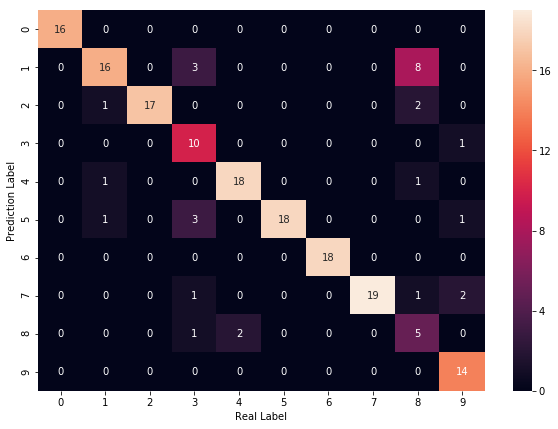

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:22 index:[5] real:5
#1 min_error:26 index:[2] real:2
#2 min_error:25 index:[1] real:8
#3 min_error:10 index:[0] real:0
#4 min_error:22 index:[1] real:1
#5 min_error:17 index:[7] real:7
#6 min_error:11 index:[6] real:6
#7 min_error:27 index:[3] real:3
#8 min_error:6 index:[2] real:2
#9 min_error:25 index:[1] real:1
#10 min_error:35 index:[7] real:7
#11 min_error:27 index:[8] real:4
#12 min_error:14 index:[6] real:6
#13 min_error:30 index:[3] real:3
#14 min_error:21 index:[1] real:1
#15 min_error:32 index:[3] real:3
#16 min_error:28 index:[7] real:9
#17 min_error:19 index:[1] real:1
#18 min_error:29 index:[7 8] real:7
#19 min_error:10 index:[6] real:6
#20 min_error:26 index:[8] real:8
#21 min_error:10 index:[4] real:4
#22 min_error:27 index:[3] real:3
#23 min_error:31 index:[1] real:1
#24 min_error:13 index:[4] real:4
#25 min_error:17 index:[0] real:0
#26 min_error:16 index:[5] real:5
#27 min_error:22 index:[3] real:3
#28 min_error:19 index:[6] real:6
#29 min_error:26 index:

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8701298701298701
Avg Base Learner:0.8032962275819421


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.07777777777777778
Accuracy on training set: 0.13333333333333333
Accuracy on training set: 0.19444444444444445
Accuracy on training set: 0.2388888888888889
Accuracy on training set: 0.36666666666666664
Accuracy on training set: 0.2611111111111111
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.4722222222222222
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.6
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.6388888888888888
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.638888

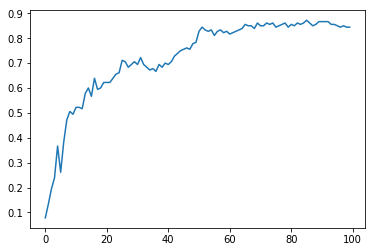

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.07777777777777778,
 0.13333333333333333,
 0.19444444444444445,
 0.2388888888888889,
 0.36666666666666664,
 0.2611111111111111,
 0.38333333333333336,
 0.4722222222222222,
 0.5055555555555555,
 0.49444444444444446,
 0.5222222222222223,
 0.5222222222222223,
 0.5166666666666667,
 0.5777777777777777,
 0.6,
 0.5666666666666667,
 0.6388888888888888,
 0.5944444444444444,
 0.6,
 0.6222222222222222,
 0.6222222222222222,
 0.6222222222222222,
 0.6388888888888888,
 0.6555555555555556,
 0.6611111111111111,
 0.7111111111111111,
 0.7055555555555556,
 0.6833333333333333,
 0.6944444444444444,
 0.7055555555555556,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6833333333333333,
 0.6722222222222223,
 0.6777777777777778,
 0.6666666666666666,
 0.6944444444444444,
 0.6833333333333333,
 0.7,
 0.6944444444444444,
 0.7055555555555556,
 0.7277777777777777,
 0.7388888888888889,
 0.75,
 0.7555555555555555,
 0.7611111111111111,
 0.7555555555555555,
 0.7777777777777778,
 0.7833333333333333,
 0.